In [1]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
df = dd.read_csv("datos_SUBE/Datos_Vega.csv",encoding = "ISO-8859-1", sep=";")

In [3]:
columns_keep = ["LONGITUD","LATITUD","FECHA_HORA","RAMAL","MODO"]
df_fil = df[columns_keep]


cond = "MODO" == "COL"
condition_modo = df_fil["MODO"] == "COL"
df_fil_modo = df_fil[condition_modo]

df_fil1 = df_fil_modo.drop(["MODO"], axis=1)
df_fil1["HORA"] = df_fil1["FECHA_HORA"].apply(lambda x: x[-2:])
df_fil1["FECHA"] = df_fil1["FECHA_HORA"].apply(lambda x: datetime.strptime(x[:-3],"%d/%m/%Y"), meta=('x',str))
df_fil1= df_fil1.drop(["FECHA_HORA"],axis=1)
#df_fil1= df_fil1.set_index("FECHA") 

/home/cooper-cooper/.local/lib/python3.6/site-packages/dask/dataframe/core.py:3370: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('FECHA_HORA', 'object'))

  warnings.warn(meta_warning(meta))


#### INSPECT SINGLE PARTITION

In [4]:
par1 = df_fil1.get_partition(0)
with ProgressBar():
    dp1 = par1.compute()

[########################################] | 100% Completed |  5.3s


In [5]:
set(dp1["RAMAL"])

{'202G', '307D', '503R16', '561BA', 'OE65', 'SUR19', 'SUR21'}

In [6]:
dp1 = dp1.set_index("FECHA")

In [7]:
dp1

,LONGITUD,LATITUD,RAMAL,HORA
FECHA,,,,
2019-12-04,-58.052,-34.954,561BA,06
2019-12-04,-58.052,-34.954,561BA,06
2019-12-04,-58.052,-34.954,561BA,06
2019-12-04,-58.052,-34.954,561BA,09
2019-12-04,-58.052,-34.954,561BA,09
...,...,...,...,...
2019-10-24,-57.962,-34.928,307D,21
2019-10-24,-57.962,-34.928,307D,21
2019-10-24,-57.962,-34.928,307D,21


In [21]:
import networkx as nx
import osmnx as ox
ox.config(log_console=True)


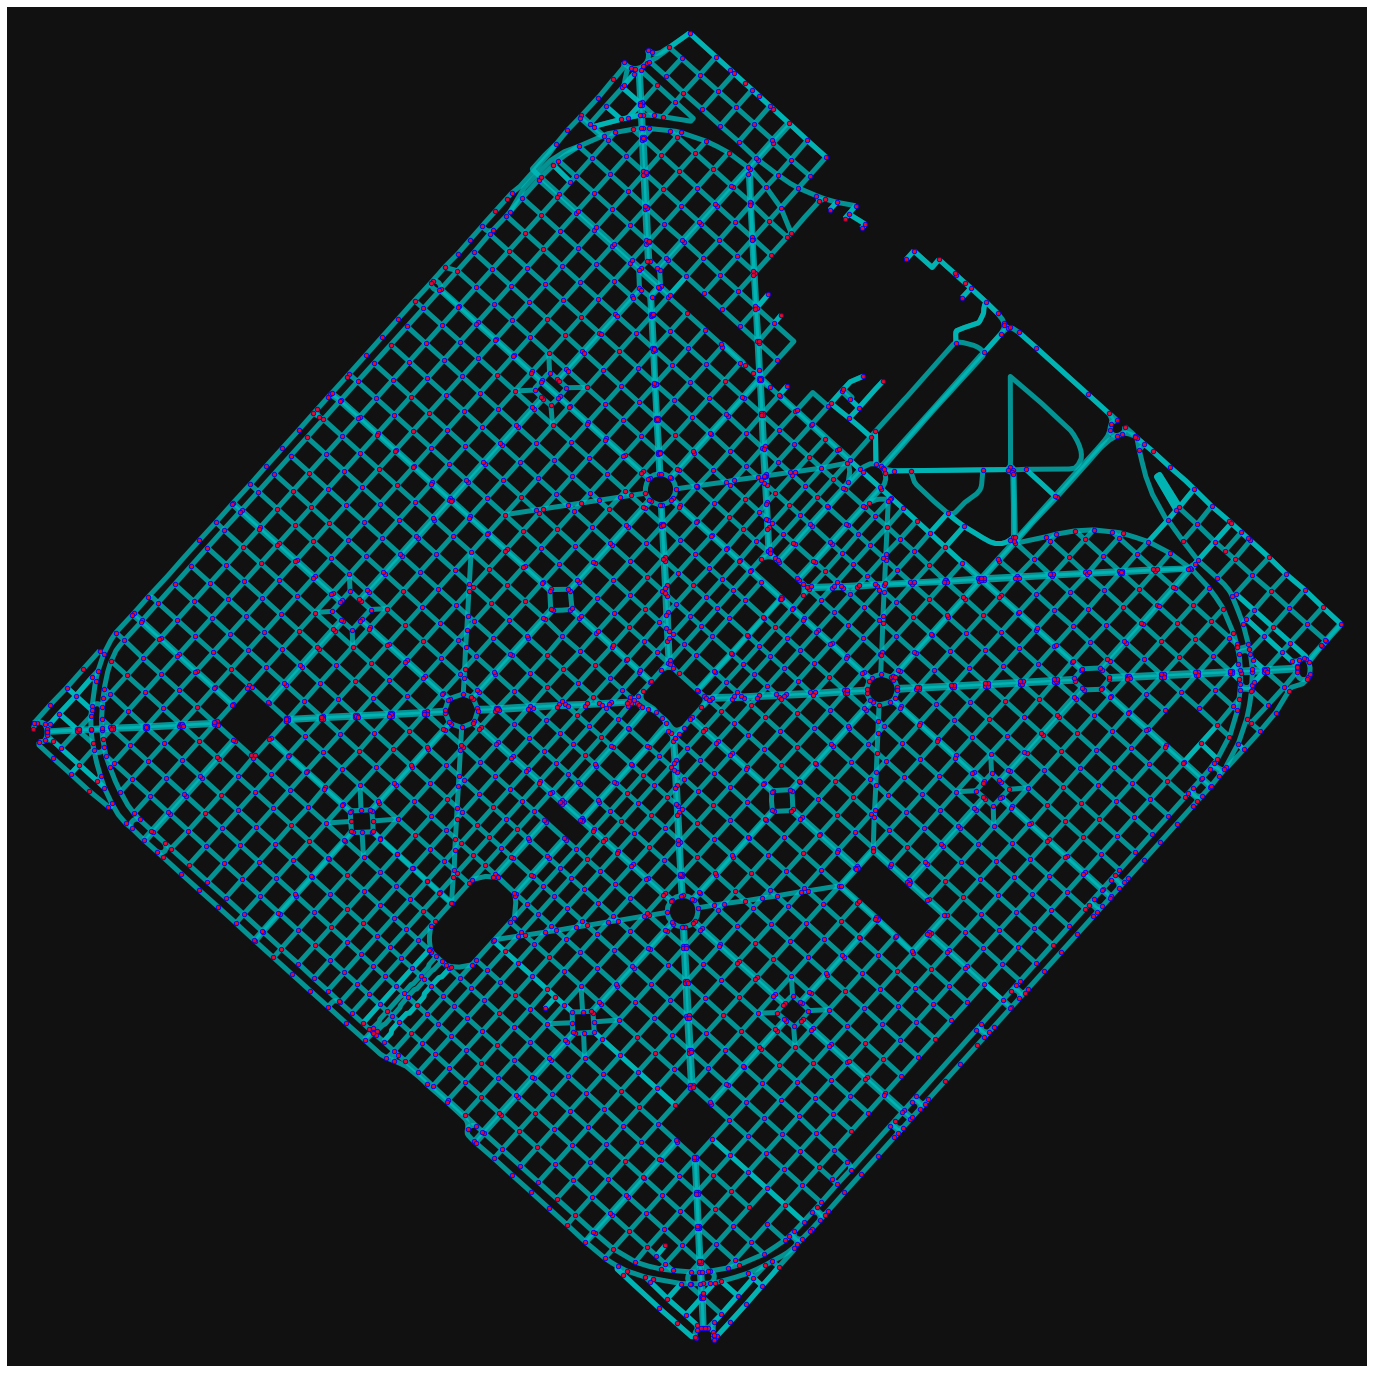

In [23]:
Gwalk = ox.graph_from_place("La Plata, Argentina", network_type="walk")
Gdrive = ox.graph_from_place("La Plata, Argentina", network_type="drive")

fig, ax = ox.plot_graph(
    Gdrive,
    ax=None,  # optionally draw on pre-existing axis
    figsize=(25, 25),  # figure size to create if ax is None
    bgcolor="#111111",  # background color of the plot
    node_color="red",  # color of the nodes
    node_size=20,  # size of the nodes: if 0, skip plotting them
    node_alpha=0.9,  # opacity of the nodes
    node_edgecolor="blue",  # color of the nodes' markers' borders
    node_zorder=1,  # zorder to plot nodes: edges are always 1
    
    edge_linewidth=5,
    edge_color="c",
    edge_alpha=0.75,  # opacity of the edges
    
    show=True,  # if True, call pyplot.show() to show the figure
    close=False,  # if True, call pyplot.close() to close the figure
    save=False,  # if True, save figure to disk at filepath
    filepath=None,  # if save is True, the path to the file
    dpi=300,  # if save is True, the resolution of saved file
    bbox=None,  # bounding box to constrain plot
)    
    


In [27]:
for GG in [Gdrive, Gwalk]:
    print(len(list(GG.nodes())))

2710
3981


In [28]:
for GG, des in zip([Gdrive, Gwalk], ["drive","walk"]):
    ox.io.save_graphml(GG,"graph_data/{}".format(des))

Try to plot trajectories 

In [29]:
Gdrive.graph

{'created_date': '2021-09-05 23:49:33',
 'created_with': 'OSMnx 1.1.1',
 'crs': 'epsg:4326',
 'simplified': True}

In [41]:
list(Gdrive.adjacency())[0]

(199803279,
 {199803280: {0: {'osmid': 20632902,
    'oneway': True,
    'lanes': '3',
    'ref': '055-10',
    'name': 'Boulevard 84',
    'highway': 'primary',
    'maxspeed': '60',
    'length': 149.516}},
  250914089: {0: {'osmid': 23199639,
    'oneway': True,
    'name': 'Calle 68',
    'highway': 'residential',
    'maxspeed': '40',
    'length': 97.605}}})

In [47]:
Gdrive.get_edge_data(199803279, 199803280)

{0: {'osmid': 20632902,
  'oneway': True,
  'lanes': '3',
  'ref': '055-10',
  'name': 'Boulevard 84',
  'highway': 'primary',
  'maxspeed': '60',
  'length': 149.516}}

In [49]:
list(Gdrive.in_edges())

[(250913952, 199803279),
 (199803279, 199803280),
 (250914086, 199803280),
 (199803280, 199803281),
 (250913740, 199803284),
 (250914154, 199803285),
 (199803285, 199803286),
 (250914126, 199803286),
 (250913974, 199804824),
 (250933079, 199804824),
 (199804824, 199804825),
 (199804825, 199804826),
 (199804826, 199804827),
 (251033965, 199807867),
 (253617581, 199807867),
 (199807871, 199807869),
 (253719375, 199807871),
 (199807874, 199807873),
 (251033606, 199807873),
 (2719409517, 199807874),
 (199807880, 199807876),
 (251033600, 199807876),
 (199807881, 199807880),
 (199807882, 199807881),
 (251033586, 199807881),
 (199807884, 199807882),
 (250914166, 199807884),
 (250933077, 199807884),
 (3438060462, 199807884),
 (250914163, 199807885),
 (253100200, 199812067),
 (199812067, 199812069),
 (199812069, 199812072),
 (199812072, 199812073),
 (199812073, 199812076),
 (253100181, 199812076),
 (2009738003, 199812077),
 (199812077, 199812078),
 (199812078, 199812080),
 (199812080, 199812082

In [51]:
Gdrive.size()

5170

In [52]:
len(Gdrive.edges())

5170

A possible thing would be to get a map from (LON,LAT) to edges

In [60]:
list(Gdrive.adjacency())[0]

(199803279,
 {199803280: {0: {'osmid': 20632902,
    'oneway': True,
    'lanes': '3',
    'ref': '055-10',
    'name': 'Boulevard 84',
    'highway': 'primary',
    'maxspeed': '60',
    'length': 149.516}},
  250914089: {0: {'osmid': 23199639,
    'oneway': True,
    'name': 'Calle 68',
    'highway': 'residential',
    'maxspeed': '40',
    'length': 97.605}}})

In [68]:
list(Gdrive.nodes())[0]

199803279

In [74]:
Gwalk[199803279]

AdjacencyView({199803280: {0: {'osmid': 20632902, 'oneway': False, 'lanes': '3', 'ref': '055-10', 'name': 'Boulevard 84', 'highway': 'primary', 'maxspeed': '60', 'length': 149.516}}, 250914089: {0: {'osmid': 23199639, 'oneway': False, 'name': 'Calle 68', 'highway': 'residential', 'maxspeed': '40', 'length': 97.605}}, 2844536777: {0: {'osmid': 20632902, 'oneway': False, 'lanes': '3', 'ref': '055-10', 'name': 'Boulevard 84', 'highway': 'primary', 'maxspeed': '60', 'length': 12.942, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f894a954358>}}})

In [79]:
Gdrive.nodes[list(Gdrive.nodes)[0]]

{'y': -34.91677, 'x': -57.9204624, 'street_count': 3}

In [81]:
len(Gdrive.nodes)

2710

### Another way of showing

In [82]:
from IPython.display import IFrame
import os 


In [83]:
m1 = ox.plot_graph_folium(Gdrive, popup_attribute="name", weight=2, color="#8b0000")
# save as html file then display map as an iframe
os.makedirs("data_map_plots",exist_ok=True)
filepath = "data_map_plots/graph.html"
m1.save(filepath)
IFrame(filepath, width=600, height=500)

ImportError: folium must be installed to use this optional feature